In [94]:
# !pip install kaggle

In [95]:
%reset -f

In [96]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [97]:
!ls ~/.kaggle/

kaggle.json


In [98]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [99]:
!ls

 cat_dog_classifier_model.h5   kaggle.json	      test1	  train.zip
 dogs-vs-cats.zip	       sample_data	      test1.zip
'image resized'		       sampleSubmission.csv   train


In [100]:
from zipfile import ZipFile

dataset=['/content/dogs-vs-cats.zip']

for item in dataset:
  with ZipFile(item,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [101]:
from zipfile import ZipFile
dataset=['/content/train.zip']

for item in dataset:
  with ZipFile(item,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [102]:
dataset=['/content/test1.zip']

for item in dataset:
  with ZipFile(item,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [103]:
import os
path,dir,files=next(os.walk('/content/test1'))
file_count=len(files)
print(file_count)

12500


In [104]:
path,dir,files=next(os.walk('/content/train'))
file_count=len(files)
print(file_count)

25000


In [105]:
file_names=os.listdir('/content/train')
file_names[:10]

['cat.9610.jpg',
 'dog.4920.jpg',
 'cat.1714.jpg',
 'cat.8778.jpg',
 'cat.11527.jpg',
 'dog.7766.jpg',
 'cat.10723.jpg',
 'cat.12337.jpg',
 'dog.9811.jpg',
 'dog.1305.jpg']

In [106]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

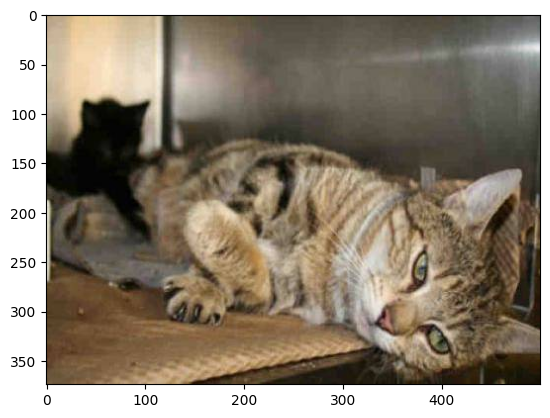

In [155]:
#Displying the images cats or dogs
img=mpimg.imread('/content/train/cat.9610.jpg')
imgplot=plt.imshow(img)
plt.show()

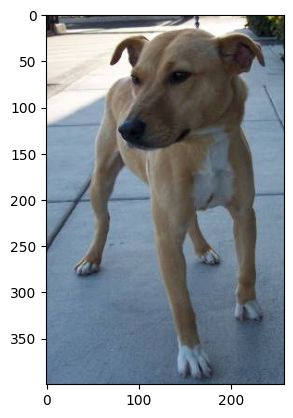

In [156]:
img_dog=mpimg.imread('/content/train/dog.9610.jpg')
imgplot=plt.imshow(img_dog)
plt.show()

In [157]:

file_names=os.listdir('/content/train')
for i in range(5):
  name=file_names[i]
  print(name[0:3])


cat
dog
cat
cat
cat


In [158]:
file_name=os.listdir('/content/train')
dog_count=0
cat_count=0

for img in file_name:
  name=img[0:3]

  if name=='cat':
    cat_count +=1
  else:
    dog_count +=1

print(dog_count)
print(cat_count)

12500
12500


#Resizeing the images

In [111]:
# os.mkdir('/content/image resized')

In [112]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(3000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((200,200))
  img=img.convert('RGB')

  new_img=resized_folder+filename
  img.save(new_img)


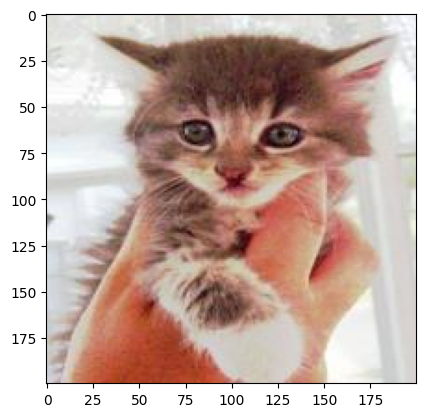

In [159]:
img=mpimg.imread('/content/image resized/cat.100.jpg')
implot=plt.imshow(img)
plt.show()

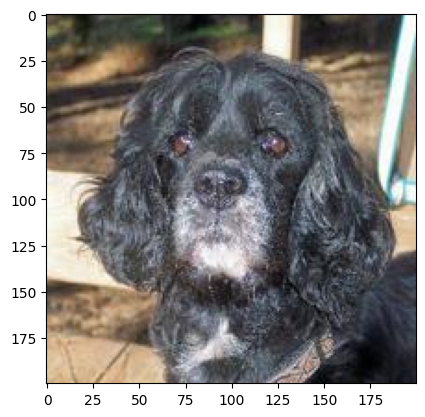

In [160]:
img=mpimg.imread('/content/image resized/dog.7766.jpg')
implot=plt.imshow(img)
plt.show()

# creating label for resized of cat or dog
### cat 0
### dog 1

In [115]:
import os
filename=os.listdir('/content/image resized/')
labels=[]

for i in range(3000):
  file_name=filename[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [116]:
print(filename[0:5])
print(len(filename))

In [161]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
3000


In [162]:
values,count=np.unique(labels,return_counts=True)
print(values)
print(count)

[0 1]
[1497 1503]


In [119]:
import cv2
import glob

###Converting all the resized images to numpy array

In [120]:
image_directory='/content/image resized/'
image_extension=['png','jpg']
target_size = (200, 200)

files = []
[files.extend(glob.glob(image_directory + '*.' + ext)) for ext in image_extension]

#
dog_cat_images = []

for file in files:
    img = cv2.imread(file)
    if img is not None:
        img_resized = cv2.resize(img, target_size)
        dog_cat_images.append(img_resized)

dog_cat_images = np.asarray(dog_cat_images)

In [163]:
print(type(dog_cat_images))

<class 'numpy.ndarray'>


In [164]:
dog_cat_images.shape

(3000, 200, 200, 3)

In [123]:
x=dog_cat_images
y=np.asarray(labels)

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [125]:
x.shape,x_train.shape,x_test.shape

((3000, 200, 200, 3), (2400, 200, 200, 3), (600, 200, 200, 3))

In [126]:
x_train_scale=x_train/255
x_test_scale=x_test/255

In [165]:
print(x_train_scale)

[[[[0.49019608 0.51372549 0.47058824]
   [0.99215686 1.         0.96862745]
   [0.87843137 0.90588235 0.85490196]
   ...
   [0.77647059 0.83137255 0.82352941]
   [0.96470588 1.         1.        ]
   [0.43921569 0.48235294 0.4745098 ]]

  [[0.40392157 0.42745098 0.38431373]
   [0.90196078 0.92941176 0.87843137]
   [0.7372549  0.76470588 0.71372549]
   ...
   [0.44313725 0.49803922 0.49019608]
   [0.81568627 0.85882353 0.85098039]
   [0.40784314 0.45098039 0.44313725]]

  [[0.4627451  0.48627451 0.44313725]
   [0.9372549  0.96470588 0.91372549]
   [0.74509804 0.77254902 0.72156863]
   ...
   [0.41568627 0.47058824 0.4627451 ]
   [0.83137255 0.8745098  0.86666667]
   [0.47843137 0.52156863 0.51372549]]

  ...

  [[0.5254902  0.5254902  0.5254902 ]
   [0.70196078 0.70196078 0.70196078]
   [0.10588235 0.10588235 0.10588235]
   ...
   [0.08235294 0.08235294 0.08235294]
   [0.66666667 0.66666667 0.66666667]
   [0.51372549 0.51372549 0.51372549]]

  [[0.55686275 0.55686275 0.55686275]
   [0.7

In [128]:
import tensorflow as tf

In [129]:
num_of_class=2

inputs = tf.keras.Input(shape=(200, 200, 3), name="input_image")
x=tf.keras.layers.Conv2D(32,(3,3),activation='relu')(inputs)

In [130]:
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

In [131]:
x=tf.keras.layers.MaxPooling2D((2,2))(x)

In [132]:
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

In [133]:
x = tf.keras.layers.Flatten()(x)

In [134]:
x = tf.keras.layers.Dense(64, activation='relu')(x)

In [135]:
x = tf.keras.layers.Dropout(0.5)(x)

In [136]:
x = tf.keras.layers.Dropout(0.5)(x)

In [137]:
output=tf.keras.layers.Dense(num_of_class,activation='softmax')(x)

In [138]:
model=tf.keras.Model(inputs=inputs,outputs=output)

In [139]:
model.compile(
      optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [140]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,180,738 (4.50 MB)

 Trainable params: 1,180,738 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model.fit(x_train_scale, y_train, epochs=15, validation_data=(x_test_scale, y_test))

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5090 - loss: 0.8434 - val_accuracy: 0.5650 - val_loss: 0.6809
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 70s 890ms/step - accuracy: 0.5679 - loss: 0.6839 - val_accuracy: 0.6617 - val_loss: 0.6723
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 893ms/step - accuracy: 0.6304 - loss: 0.6590 - val_accuracy: 0.6550 - val_loss: 0.6349
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 863ms/step - accuracy: 0.6594 - loss: 0.6227 - val_accuracy: 0.6667 - val_loss: 0.6289
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 859ms/step - accuracy: 0.7055 - loss: 0.5939 - val_accuracy: 0.6583 - val_loss: 0.6017
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 68s 899ms/step - accuracy: 0.7017 - loss: 0.5743 - val_accuracy: 0.6817 - val_loss: 0.5888
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 899ms/step - accuracy: 0.7076 - loss: 0.5578 - val_accuracy: 0.6700 - val_loss: 0.5956
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 884ms/step - accuracy: 0.7563 - loss: 0.5054 - val_accurac

In [142]:
score,acc=model.evaluate(x_test_scale,y_test)
print('Test score:',score)
print('Test accuracy:',acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.6862 - loss: 0.6089
Test score: 0.6079617142677307
Test accuracy: 0.6966666579246521


In [148]:
model.save('cat_dog_classifier_model_new.h5')


In [149]:
from tensorflow.keras.models import load_model

In [150]:
model=load_model('/content/cat_dog_classifier_model_new.h5')

In [151]:
input_image = cv2.imread('/content/test1/1.jpg')
input_image = cv2.resize(input_image, (200, 200))
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, axis=0)

In [152]:
input_image = cv2.imread('/content/test1/10.jpg')

if input_image is None:
    print("Error: Could not load image from path:",input_image )
else:
    # Resize the image to match the model's input size (224x224)
    input_image_resized = cv2.resize(input_image, (200, 200))

    # Convert the image to a NumPy array
    input_image_np = np.asarray(input_image_resized)

    # Reshape the array to include a batch dimension (model expects input in shape (batch_size, height, width, channels))
    input_image_reshaped = input_image_np.reshape(1, 200, 200, 3)

    # Normalize the image data (divide by 255) to match the training data
    input_image_scaled = input_image_reshaped / 255

    # Make the prediction
    prediction = model.predict(input_image_scaled)

    # Get the predicted class (index with the highest probability)
    prediction_label = np.argmax(prediction)

    # Print the result
    if prediction_label == 0:
        print("The image is predicted to be a CAT")
    else:
        print("The image is predicted to be a DOG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
The image is predicted to be a CAT
